## Titanic Classification

#### Import Library

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
titanic = pd.read_csv('./data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Preprocessing

In [8]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
titanic.Age.fillna(titanic.Age.mean(), inplace=True)
titanic.Embarked.fillna(titanic.Embarked.mode(), inplace=True)
titanic.Cabin.fillna('UNK', inplace=True)

In [12]:
# 각 특성별 분포 혹은 빈도 확인
print('Sex Value:\n',titanic.Sex.value_counts())
print('Pclass Value:\n',titanic.Pclass.value_counts())
print('etc...')

Sex Value:
 male      577
female    314
Name: Sex, dtype: int64
Pclass Value:
 3    491
1    216
2    184
Name: Pclass, dtype: int64
etc...


In [13]:
titanic.Cabin = titanic.Cabin.str[:1]
titanic.Cabin.value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [14]:
# 가치 없는 특성은 삭제
col = ['PassengerId', 'Name', 'Ticket']
titanic = titanic.drop(col, axis='columns')
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,U,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,U,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,U,S


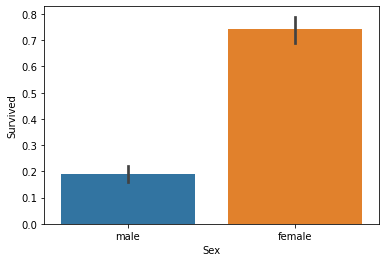

In [17]:
sns.barplot(x='Sex', y='Survived', data=titanic);

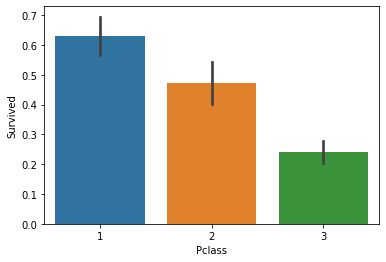

In [18]:
sns.barplot(x='Pclass', y='Survived', data=titanic);

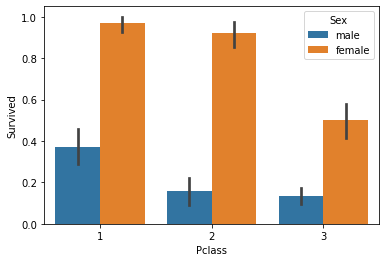

In [19]:
sns.barplot(x='Pclass', y='Survived', data=titanic, hue='Sex');

In [20]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex','Cabin','Embarked']
for col in cols:
    le= LabelEncoder()
    titanic[col] = le.fit_transform(titanic[col])
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,8,2
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,8,2
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,8,2


#### Modeling

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = titanic.drop('Survived', axis=1)
y = titanic.Survived

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=2022
)

dt = DecisionTreeClassifier(random_state=2022)

dt.fit(X_train, y_train)

pred = dt.predict(X_test)

#### Evaluation

In [31]:
from sklearn.metrics import confusion_matrix
pred = dt.predict(X)
confusion_matrix(y, pred)

array([[518,  31],
       [ 41, 301]], dtype=int64)

In [29]:
pred_prob = dt.predict_proba(X)

In [41]:
pred_prob[:,1]

array([0.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.83333333, 0.        , 0.        ,
       1.        , 0.25      , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.83333333, 0.        , 0.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 1.        , 0.5       , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.     

In [30]:
threshold = 0.5
confusion_matrix(y, pred_prob[:,1]>threshold)

array([[518,  31],
       [ 41, 301]], dtype=int64)

In [32]:
threshold = 0.4
confusion_matrix(y, pred_prob[:,1]>threshold)

array([[513,  36],
       [ 38, 304]], dtype=int64)

In [34]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y, pred_prob[:,1])

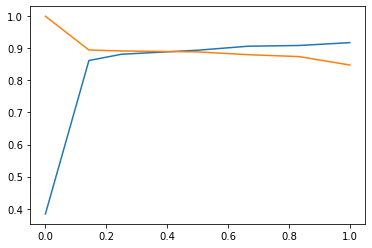

In [36]:
plt.plot(thresholds, precisions[0:len(thresholds)])
plt.plot(thresholds, recalls[0:len(thresholds)])

In [37]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [38]:
accuracy_score(y, pred_prob[:,1]>0.5)

0.9191919191919192

In [39]:
accuracy_score(y, pred_prob[:,1]>0.3)

0.9169472502805837

In [42]:
f1_score(y, pred_prob[:,1]>0.3)

0.8914956011730205

In [43]:
from sklearn.metrics import roc_curve

fprs, tprs, threshold = roc_curve(y, pred_prob[:,1])
pd.DataFrame({'fprs':fprs[:len(thresholds)], 'tprs':tprs[:len(thresholds)], 'Threshold':thresholds})

,fprs,tprs,Threshold
0,0.000000,0.000000,0.000000
1,0.047359,0.847953,0.142857
2,0.054645,0.874269,0.250000
3,0.056466,0.880117,0.500000
4,0.065574,0.888889,0.666667
5,0.074681,0.891813,0.833333
6,0.089253,0.894737,1.000000


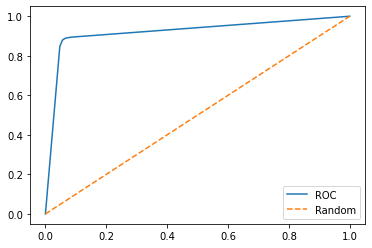

In [44]:
plt.plot(fprs, tprs, label='ROC')
plt.plot([0,1], [0,1], '--', label='Random')
plt.legend();

In [45]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, pred_prob[:,1])

0.9199448225907818